In [235]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

<h2> Exercise 2 </h2>
<br>
<h4> 1. </h4>

We are buying and selling electricity.
The more we buy, the better price per kwH we will get.
Buying price of electricity follows function $ f(x) = 1- 0.01x $, where $ 0 ≤ x ≤ 50 $ is the amount of electricity we buy.
<p> Selling price of electricity follows the function $ g(x) = 2 - 0.01x^2 $ where x is the amount of electricity we sell. </p>
Let's formulate this as an optimization problem:
<br>
<br>
Profit = Revenue - Cost and 
Revenue = Price * x, where x is the number of units we will sell. And Cost = Price * x, where x is the amount of units we will buy.


$$ \text{profit} = g(x)x - f(x)x $$
$$  = (2 - 0.01x^2)x - (1 - 0.01x)x $$
$$  = 2x - 0.01x^3 - 1x + 0.01x^2 $$
$$  = x - 0.01x^3 + 0.01x^2 $$


<br>
Now that we have our profit equation, we can form our optimization problem as:
$$ \qquad \max \qquad x - 0.01x^3 + 0.01x^2  $$
$$\text{s.t.} \qquad 0 ≤ x ≤ 50 $$

<h4> 2. </h4>
<br>
<p> We will be using bisection search to optimize problem: </p>
$$  \min \qquad (1-x)^2 + x  $$
$$\text{s.t.} \qquad 0 ≤ x ≤ 2 $$

In [236]:
def f(x):
    function = (1-x)**2 + x
    return function

In [237]:
def bisection(a,b,f,L,eps):
    #(Set x as the starting point of interval and y as the end point)
    x = a
    y = b
    steps = []
    #(while y-x>2*L)
    while y-x > 2*L:
        #(if the function is increasing at the mid point between x and y:
        #set y as the midpoint between y and x, because a local optimum is before the midpoin)
        
        #because we need to see how to function is beheaving close to midpoints without limits
        #we will be using epsilon (a really small number) to check this from both sides of midpoints:
        midpoint1 = (x+y)/2+eps
        midpoint2 = (x+y)/2-eps
        #print("midpoint1: ", midpoint1, " midpoint2: ", midpoint2)
        
        if f(midpoint1) > f(midpoint2):
            y = midpoint1
            
        #(otherwise: set x as the midpoint, because a local optimum is after the midpoint)
        else:
            x = midpoint2
            
    #return midpoint between x and y
    return (x+y)/2

In [238]:
L = 0.001
epsilon = 1e-5
x = bisection(0.0,2.0,f,L,epsilon)
print(x, f(x))
print("optimal is: ", x, " and function value is: ", f(x))

0.499028447265625 0.7500009439147157
optimal is:  0.499028447265625  and function value is:  0.7500009439147157


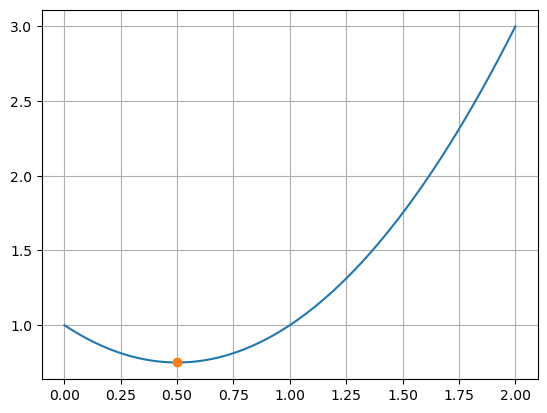

In [239]:
L = 0.001
epsilon = 1e-6
y = bisection(0.0,2.0,f,L,epsilon)

x = np.linspace(0.0, 2.0, 100)
plt.plot(x, f(x))
plt.plot(y,f(y),  marker='o')
plt.grid()
plt.show()

<h4> 3. </h4> 

<p> We will be using golden section search to optimize function from task 2. </p>
$$  \min \qquad (1-x)^2 + x  $$
$$\text{s.t.} \qquad 0 ≤ x ≤ 2 $$

In [240]:
def golden(a,b,f,L):
    #(Set x as the start point of interval and y as the end point)
    x = a
    y = b
    
    #(Divide the interval [x,y] in the golden section from the left and right and attain two division points
    #If the greater of the division points has a greater function value 
    #set y as the rightmost division point, because a local optimum is before that)
    
    while y-x>2*L:
        
        left_ratio = y-((math.sqrt(5.0)-1)/2.0)*(y-x)
        right_ratio = x+((math.sqrt(5.0)-1)/2.0)*(y-x)
        
        if f(left_ratio) < f(right_ratio):
            y = right_ratio
        #(otherwise:
        #set x as the leftmost division point, because a local optimum is after that)
        else:
            x = left_ratio
    
    #return midpoint between x and y
    return (x+y)/2
        
        

In [241]:
L = 0.0001
epsilon = 1e-5
z = golden(0.0,4.0,f,L)
print("optimal is: ", z, " and function value is: ", f(z))

optimal is:  0.5000144673135177  and function value is:  0.7500000002093031


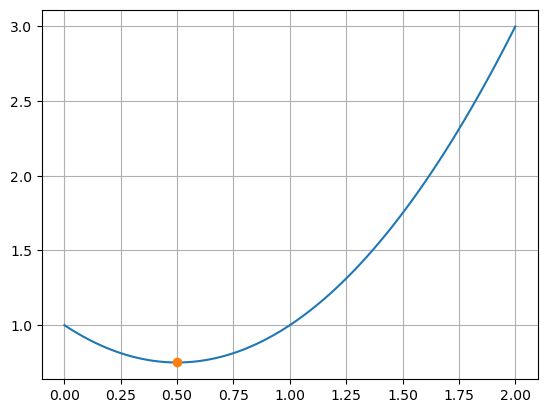

In [242]:
L = 0.00001
g = golden(0.0,2.0,f,L)
x1 = np.linspace(0.0, 2.0, 100)
plt.plot(x1, f(x1))
plt.plot(g,f(g),  marker='o')
plt.grid()
plt.show()

<h4> 4.1 </h4>
<p> Using differentiation we can solve the function from task 1: </p>
<br>
$$ \qquad \max \qquad x - 0.01x^3 + 0.01x^2  $$
$$\text{s.t.} \qquad 0 ≤ x ≤ 50 $$

Let $$ f(x) = x - 0.01x^3 + 0.01x^2 $$

$$ f'(x) = 1 - 0.03x^2 + 0.02x $$
<br>
$$ f''(x) = -0.06x + 0.02 $$

Let's see when the first derivative is 0:
$$  1 - 0.03x^2 + 0.02x = 0 $$
<br>
$$ x = \frac{-0.02 \pm \sqrt{0.02^2 - 4 * -(0.03) * 1}}{2 * 0.03} $$
<br>
$$ x = \frac{-0.02 \pm \sqrt{0.1204}}{0.06} $$
<br>
derivative is $0$ if $x = -5.44978...$ or $ x = 6.11645... $
<br>
<br>
Second derivative $f''(6.116) $:
$$ -0.06 * (6.116) + 0.02 < 0 $$
<br>
So 6.116 is local maximum

<h4> 4.2 </h4>
<p> Now let's solve the function from task 2 and 3: </p>
$$  \min \qquad (1-x)^2 + x  $$
$$\text{s.t.} \qquad 0 ≤ x ≤ 2 $$
<br>
Let $$ f(x) = (1-x)^2 + x $$
<br>
So $$ f'(x) = 2(1-x)(-1) + 1 $$ 
$$= 2x - 1 $$ 
<br>
And $$ f''(x) = 2 $$ 
<br> 
We can see that $f''(x) > 0$ with all $ x \in R $
<br>
<br>
Let's see when first derivative is 0: $$ 2x - 1 = 0 $$
$$ x = \frac{1}{2} $$
<br> 
So $x = \frac{1}{2}$ is the local minimum
just like we saw before with bisection and golden section algorithms.